In [2]:
import numpy as np 
import random
import networkx as nx
import matplotlib.pyplot as plt
import time 

In [2]:
def nNumber(G,r,step):
    n=len(G)
    z=n
    t=0
    M_array=np.zeros(step)
    M={random.randint(0,n-1)}
    D={j for j in range(0,n)}
    R=D-M;u=0
    while u<step:
        i=len(M)     
        k=random.random()
        pi_neg=(n-i)/((n-i)+(i*r))
        pi_pos=(i*r)/((n-i)+(i*r))
        pii=1-(pi_neg+pi_pos)
        if k<(1-pii) and i!=0  :

        
            if k<pi_pos:  ###probabililty for a mutant to reproduce
                ch=random.sample(M,1)
                NE=[n for n in G.neighbors(ch[0])]
                chh=random.sample(NE,1)
                if chh[0]  in R:
                    M.add(chh[0])
                    R.remove(chh[0])
                    t+=1

            else:   ###of course when p <(1-pii) and >pi_pos so this is obvious this is for a mutant to die lonely
                chre=random.sample(R,1)
                NEre=[n for n in G.neighbors(chre[0])]
                chhre=random.sample(NEre,1)
                if chhre[0]  in M:
                    R.add(chhre[0])
                    M.remove(chhre[0])
                    t+=1
        M_array[u]=len(M)/n
        u=u+1
            
    return(t,M_array)

In [3]:
def addedge(G):  ###for connecting degrees=1
    a=nx.adjacency_matrix(G).toarray()
    degree=np.sum(a,axis=0)
    v=np.nonzero(degree==1)[0] ##identifying deg=1 vertices
   
    def chk(choice):
        if choice[0]!=choice[1]:
            return True
        else:
            return False
        
    
    choice=np.random.choice(v,2)
    while chk(choice)==False :
        choice=np.random.choice(v,2)
    
    a[choice[0]][choice[1]]=1;a[choice[1]][choice[0]]

    G_new=nx.from_numpy_matrix(a,create_using=nx.Graph())
    
    return G_new



def check_stability(mm):
    c=False
    if mm[-1]==1 or mm[-1]==0:
        c=True
    return c

In [12]:
t1=time.time()
num=100
step=1000000
size=200
r=3
start=0;end=250
no_graph=np.arange(start,end)
fix_time_total=[]
ext_time_total=[]
#G_tot=[];
#M=[]
for j in (no_graph):
    mm=[]
    #mm=np.zeros(num*step)
    fix_time=[];ext_time=[]

    A=np.loadtxt('stargraph_r3_'+str(j)+'.txt')    
    G=nx.from_numpy_array(A,create_using=nx.Graph())  

    for h in range (num):
        #print('h=',h)

        t,m=nNumber(G,r,step)
        
        if check_stability(m)==False:
            print('num=', h)
            print('no=', j)
        
        #mm[0:step]=m
        mm.append(m)
        if m[-1]==1:
            for tt in range (len(m)):
                if m[tt]==m[-1]:
                    fix_time.append(tt)
                    break
            
        elif m[-1]==0:
            for tt in range (len(m)):
                if m[tt]==m[-1]:
                    ext_time.append(tt)
                    break
    M_avg=mm[0]                      
    for muts in mm[1:]:
        M_avg=muts+M_avg
    M_avg=M_avg/num
    np.savetxt('M_avgstar'+str(j)+'.dat',M_avg)
    np.savetxt('fixtimestar_r3_'+str(j)+'.dat',np.array(fix_time))
    np.savetxt('exttimestar_r3_'+str(j)+'.dat',np.array(ext_time))
    #M.append(mm)
    
#np.savetxt('fixation'+str(start)+'-'+str(end)+'.dat',fix_time_total)
#np.savetxt('extinction'+str(start)+'-'+str(end)+'.dat',ext_time_total)
t2=time.time()

/tmp/ipykernel_3378/3078464903.py:28: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  chre=random.sample(R,1)
/tmp/ipykernel_3378/3078464903.py:19: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ch=random.sample(M,1)


In [3]:
star_fix=[]
for i in range (1000):
    star_fix.append(np.loadtxt('fixtimestar_r3_'+str(i)+'.dat'))

In [4]:
fs_mean=[]
for f in star_fix:
    fs_mean.append(np.sum(f)/len(f))

In [5]:
len(star_fix)

1000

Text(0, 0.5, 'fixation time_r3')

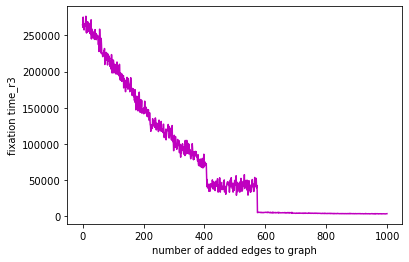

In [12]:
plt.plot(fs_mean,'m')
plt.xlabel('number of added edges to graph');plt.ylabel('fixation time_r3')

Text(0, 0.5, 'fixation time-log_r3')

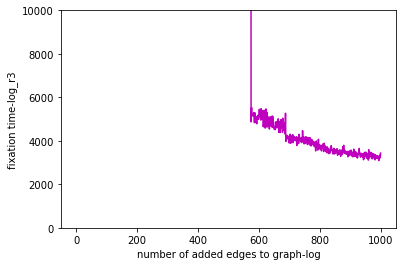

In [13]:
plt.plot(fs_mean,'m')
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,10000)
plt.xlabel('number of added edges to graph-log');plt.ylabel('fixation time-log_r3')

In [8]:
lastm_avg_star=[]
for i in range (1000):
    M_avg=np.loadtxt('M_avgstar'+str(i)+'.dat')
    lastm_avg_star.append(M_avg[-1])

Text(0, 0.5, 'fixation probablity_r3')

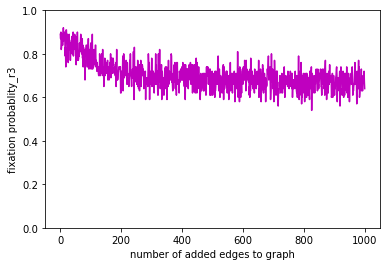

In [14]:
plt.plot(lastm_avg_star,'m')
plt.ylim(0,1)
plt.xlabel('number of added edges to graph');plt.ylabel('fixation probablity_r3')

In [15]:
np.savetxt('f10.dat',lastm_avg_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


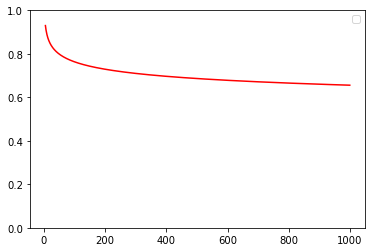

In [25]:
from numpy import arange
from scipy.optimize import curve_fit
#plt.plot(lastm_avg_star)
popt,pcov=curve_fit(lambda x,c,a:c*x**(a),np.arange(0,1000)[5:],lastm_avg_star[5:])
plt.plot(np.arange(0,1000)[5:],popt[0]*np.arange(0,1000)[5:]**(popt[1]),'r',)
plt.ylim(0,1)
plt.legend()
plt.show()

In [13]:
popt

array([ 1.03412152, -0.06593485])